
# EDA — Matrícula en Educación (Preescolar, Básica y Media) — MEN (CSV local)

**Archivo base:** `MEN_MATRICULA_EN_EDUCACION_EN_PREESCOLAR,_BÁSICA_Y_MEDIA_20250908.csv`  
**Objetivo:** Entender, Limpiar y Análizar el dataset seleccionado aplicando los conocimientos adquiridos en el curso de Mineria de Datos.


## 1) Importaciones y configuración

In [2]:

import os, gc
from pathlib import Path
from typing import List, Dict, Any
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opciones pandas
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)

# Gráficos: matplotlib puro (sin estilos ni colores específicos)


## 2) Diccionario de datos y tipos esperados

In [3]:

# Nombres en MAYÚSCULA tal como vienen en el CSV y tipo esperado
DATA_TYPES_EXPECTED = {
    "ANNO_INF": "num",
    "COD_DANE_DEPARTAMENTO": "txt",
    "DEPARTAMENTO": "txt",
    "CODIGO_SED": "num",
    "SECRETARIA": "txt",
    "COD_DANE_MUNICIPIO": "txt",
    "MUNICIPIO": "txt",
    "CODIGO_DANE": "num",
    "NOMBRE_ESTABLECIMIENTO": "txt",
    "COD_SECTOR": "txt",
    "SECTOR": "txt",
    "COD_CALENDARIO": "num",
    "CALENDARIO": "txt",
    "CODIGO_DANE_SEDE": "num",
    "NOMBRE_SEDE": "txt",
    "COD_ZONA": "txt",
    "ZONA": "txt",
    "COD_TIPO_JORNADA": "num",
    "TIPO_JORNADA": "txt",
    "COD_GRADO": "num",
    "GRADO": "txt",
    "COD_METODOLOGIA": "num",
    "METODOLOGIA": "txt",
    "COD_CARACTER": "num",
    "CARACTER": "txt",
    "COD_ESPECIALIDAD": "num",
    "ESPECIALIDAD": "txt",
    "EDAD": "num",
    "COD_GENERO": "txt",
    "GENERO": "txt",
    "COD_GRUPO_ETNICO": "num",
    "GRUPO_ETNICO": "txt",
    "COD_SECTOR_CONPES": "num",
    "SECTOR_CONPES": "txt",
    "TOTAL_MATRICULA": "num",
}

data_dict = pd.DataFrame([
    {"Columna": c, "Tipo esperado": ("numérico" if t=="num" else "texto")}
    for c,t in DATA_TYPES_EXPECTED.items()
]).sort_values("Columna").reset_index(drop=True)
data_dict


,Columna,Tipo esperado
0,ANNO_INF,numérico
1,CALENDARIO,texto
2,CARACTER,texto
3,CODIGO_DANE,numérico
4,CODIGO_DANE_SEDE,numérico
5,CODIGO_SED,numérico
6,COD_CALENDARIO,numérico
7,COD_CARACTER,numérico
8,COD_DANE_DEPARTAMENTO,texto
9,COD_DANE_MUNICIPIO,texto


## 3) Carga del CSV

In [4]:

CSV_PATH = Path("MEN_MATRICULA_EN_EDUCACION_EN_PREESCOLAR,_BÁSICA_Y_MEDIA_20250908.csv")


usecols = list(DATA_TYPES_EXPECTED.keys())
df = pd.read_csv(CSV_PATH)


print("Shape inicial:", df.shape)
display(df.head(5))


numeric_cols = [c for c,t in DATA_TYPES_EXPECTED.items() if t=="num"]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

print("\nTipos inferidos tras casting:")
display(df.dtypes.to_frame("dtype"))


C:\Users\Acer\AppData\Local\Temp\ipykernel_5656\35889487.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


Shape inicial: (7251423, 35)


,ANNO_INF,COD_DANE_DEPARTAMENTO,DEPARTAMENTO,COD_SECRETARIA,SECRETARIA,COD_DANE_MUNICIPIO,MUNICIPIO,CODIGO_DANE,NOMBRE_ESTABLECIMIENTO,COD_SECTOR,SECTOR,COD_CALENDARIO,CALENDARIO,CODIGO_DANE_SEDE,NOMBRE_SEDE,COD_ZONA,ZONA,COD_TIPO_JORNADA,TIPO_JORNADA,COD_GRADO,GRADO,COD_METODOLOGIA,METODOLOGIA,COD_CARACTER,CARACTER,COD_ESPECIALIDAD,ESPECIALIDAD,EDAD,COD_GENERO,GENERO,COD_GRUPO_ETNICO,GRUPO_ETNICO,COD_SECTOR_CONPES,SECTOR_CONPES,TOTAL_MATRICULA
0,2022,8,ATLÁNTICO,3765,SOLEDAD,8758,SOLEDAD,308758076951,CENTRO DE EDUCACION PARA ADULTOS GIMNASIO DEL ...,1002,NO_OFICIAL,52,A,308758076951,CENTRO DE EDUCACION PARA ADULTOS GIMNASIO DEL ...,1004,Urbana,4,Nocturna,26,Ciclo 6 Adultos,10,Programa para jóvenes en extraedad y adultos,0,No Aplica,0,No aplica,17,M,Masculino,0,No aplica,4,4,427
1,2022,5,ANTIOQUIA,3763,TURBO,5837,TURBO,305837800116,I.E. CENTRO DE ESTUDIOS TÉCNICOS CEPRODENT,1002,NO_OFICIAL,52,A,305837800116,I.E. CENTRO DE ESTUDIOS TÉCNICOS CEPRODENT -...,1004,Urbana,5,Fin de Semana,26,Ciclo 6 Adultos,10,Programa para jóvenes en extraedad y adultos,0,No Aplica,0,No aplica,19,M,Masculino,0,No aplica,4,4,400
2,2022,8,ATLÁNTICO,3765,SOLEDAD,8758,SOLEDAD,308758076951,CENTRO DE EDUCACION PARA ADULTOS GIMNASIO DEL ...,1002,NO_OFICIAL,52,A,308758076951,CENTRO DE EDUCACION PARA ADULTOS GIMNASIO DEL ...,1004,Urbana,4,Nocturna,26,Ciclo 6 Adultos,10,Programa para jóvenes en extraedad y adultos,0,No Aplica,0,No aplica,16,M,Masculino,0,No aplica,4,4,335
3,2022,54,NORTE DE SANTANDER,3802,CÚCUTA,54001,CUCUTA,354001008320,CORPORACION INTEGRAL DE INNOVACION SOCIAL - IN...,1002,NO_OFICIAL,52,A,354001008320,CORPORACION INTEGRAL DE INNOVACION SOCIAL - IN...,1004,Urbana,4,Nocturna,26,Ciclo 6 Adultos,10,Programa para jóvenes en extraedad y adultos,0,No Aplica,0,No aplica,17,M,Masculino,0,No aplica,4,4,331
4,2022,54,NORTE DE SANTANDER,3802,CÚCUTA,54001,CUCUTA,354001008320,CORPORACION INTEGRAL DE INNOVACION SOCIAL - IN...,1002,NO_OFICIAL,52,A,354001008320,CORPORACION INTEGRAL DE INNOVACION SOCIAL - IN...,1004,Urbana,4,Nocturna,26,Ciclo 6 Adultos,10,Programa para jóvenes en extraedad y adultos,0,No Aplica,0,No aplica,17,F,Femenino,0,No aplica,4,4,305



Tipos inferidos tras casting:


,dtype
ANNO_INF,int64
COD_DANE_DEPARTAMENTO,int64
DEPARTAMENTO,object
COD_SECRETARIA,int64
SECRETARIA,object
COD_DANE_MUNICIPIO,int64
MUNICIPIO,object
CODIGO_DANE,int64
NOMBRE_ESTABLECIMIENTO,object
COD_SECTOR,int64


## 4) Calidad de datos: nulos, duplicados y cardinalidad.

In [5]:


nulls = df.isna().mean().sort_values(ascending=False).to_frame("%nulos")
display(nulls.head(15))

dups = df.duplicated().sum()
print("Filas duplicadas (todas las columnas):", dups)

# Cardinalidad de campos clave
cols_card = ["DEPARTAMENTO","MUNICIPIO","SECTOR","ZONA","TIPO_JORNADA","GRADO","GENERO","GRUPO_ETNICO","ANNO_INF"]
for c in cols_card:
    if c in df.columns:
        print(f"- {c}: {df[c].nunique()} valores únicos")


,%nulos
COD_CALENDARIO,0.001403
METODOLOGIA,0.001141
DEPARTAMENTO,0.000725
MUNICIPIO,0.000725
SECRETARIA,0.000725
COD_DANE_DEPARTAMENTO,0.000000
ANNO_INF,0.000000
CODIGO_DANE,0.000000
NOMBRE_ESTABLECIMIENTO,0.000000
COD_SECTOR,0.000000


Filas duplicadas (todas las columnas): 0
- DEPARTAMENTO: 33 valores únicos
- MUNICIPIO: 1041 valores únicos
- SECTOR: 2 valores únicos
- ZONA: 2 valores únicos
- TIPO_JORNADA: 6 valores únicos
- GRADO: 29 valores únicos
- GENERO: 2 valores únicos
- GRUPO_ETNICO: 8 valores únicos
- ANNO_INF: 3 valores únicos


## 5) Tendencias temporales de matrícula

,ANNO_INF,TOTAL_MATRICULA
0,2022,9966211
1,2023,9800134
2,2024,9543140


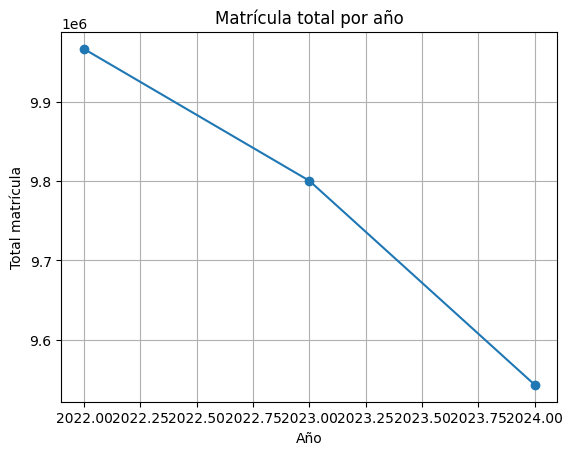

,ANNO_INF,TOTAL_MATRICULA,YoY_abs,YoY_%
0,2022,9966211,NaN,NaN
1,2023,9800134,-166077.0,-1.666401
2,2024,9543140,-256994.0,-2.622352


In [6]:
agg_year = (df
    .groupby("ANNO_INF", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("ANNO_INF")
)
display(agg_year)

plt.figure()
plt.plot(agg_year["ANNO_INF"].astype(int), agg_year["TOTAL_MATRICULA"], marker="o")
plt.title("Matrícula total por año")
plt.xlabel("Año")
plt.ylabel("Total matrícula")
plt.grid(True)
plt.show()

# Crecimiento interanual
agg_year["TOTAL_MATRICULA"] = pd.to_numeric(agg_year["TOTAL_MATRICULA"], errors="coerce")
agg_year["ANNO_INF"] = pd.to_numeric(agg_year["ANNO_INF"], errors="coerce")
agg_year["YoY_abs"] = agg_year["TOTAL_MATRICULA"].diff()
agg_year["YoY_%"] = agg_year["TOTAL_MATRICULA"].pct_change()*100
display(agg_year)


## 6) Rankings por departamento y municipio (último año disponible)

Último año detectado: 2024


,DEPARTAMENTO,TOTAL_MATRICULA
8,"CAPITAL BOGOTÁ, D.C.",1175068
1,ANTIOQUIA,1148645
30,VALLE DEL CAUCA,726510
14,CUNDINAMARCA,607492
4,ATLÁNTICO,566885
5,BOLÍVAR,518674
27,SANTANDER,424728
15,CÓRDOBA,381434
20,MAGDALENA,365815
23,NORTE DE SANTANDER,327680


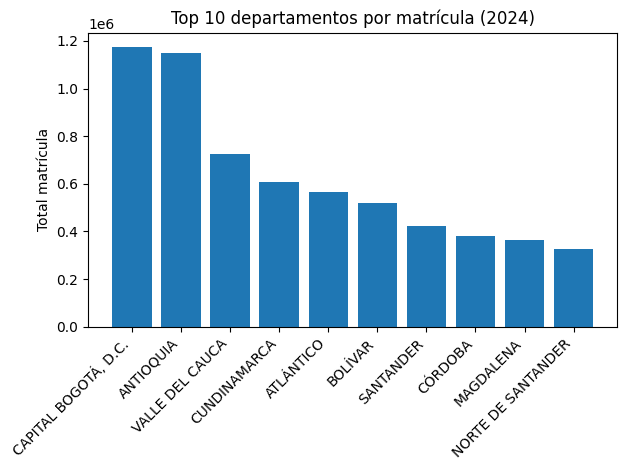

,MUNICIPIO,TOTAL_MATRICULA
100,"BOGOTÁ, D.C.",1175068
517,MEDELLÍN,398641
131,CALI,339983
84,BARRANQUILLA,257303
153,CARTAGENA,241440
236,CUCUTA,156548
874,SOLEDAD,148221
867,SOACHA,133357
830,SANTA MARTA,129989
986,VALLEDUPAR,115790


In [8]:

ultimo_anno = pd.to_numeric(df["ANNO_INF"], errors="coerce").max()
print("Último año detectado:", ultimo_anno)

dept_year = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
    .groupby("DEPARTAMENTO", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("TOTAL_MATRICULA", ascending=False)
)
display(dept_year.head(15))

plt.figure()
plt.bar(dept_year["DEPARTAMENTO"].head(10), pd.to_numeric(dept_year["TOTAL_MATRICULA"].head(10), errors="coerce"))
plt.title(f"Top 10 departamentos por matrícula ({int(ultimo_anno)})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total matrícula")
plt.tight_layout()
plt.show()

mun_year = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
    .groupby("MUNICIPIO", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("TOTAL_MATRICULA", ascending=False)
)
display(mun_year.head(20))


## 7) Brechas: sector, zona, género, grupo étnico (último año)

,SECTOR,TOTAL_MATRICULA
1,OFICIAL,7414620
0,NO_OFICIAL,2128520


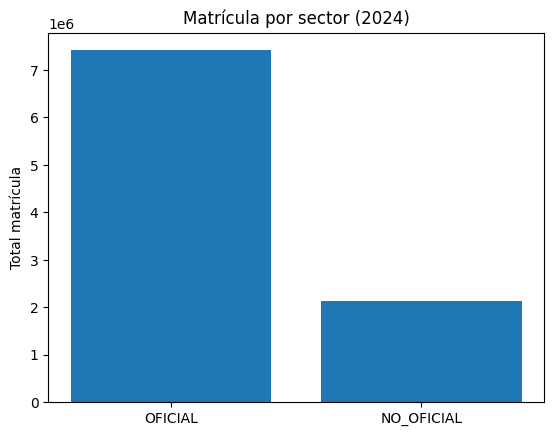

,ZONA,TOTAL_MATRICULA
1,Urbana,7249480
0,Rural,2293660


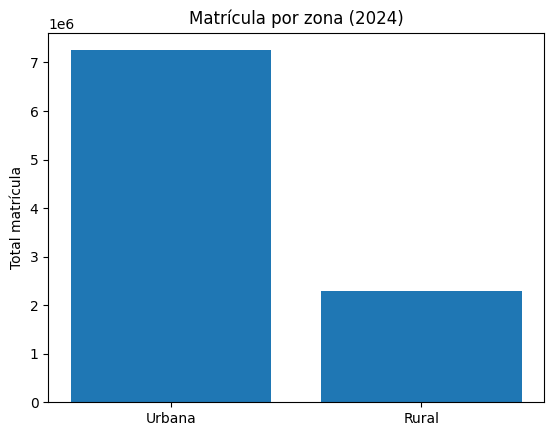

,GENERO,TOTAL_MATRICULA
1,Masculino,4847527
0,Femenino,4695613


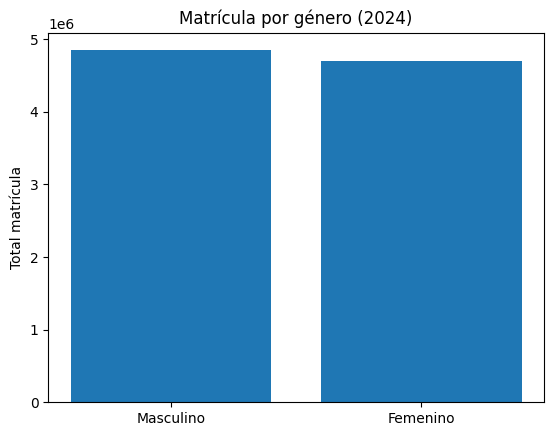

,GRUPO_ETNICO,TOTAL_MATRICULA
3,No aplica,8541402
1,Indígenas,510441
0,Afrodescendiente,290630
2,Negritudes,194448
6,Raizales,5732
5,Palenquero,193
7,Rom,168
4,Otras Étnias,126


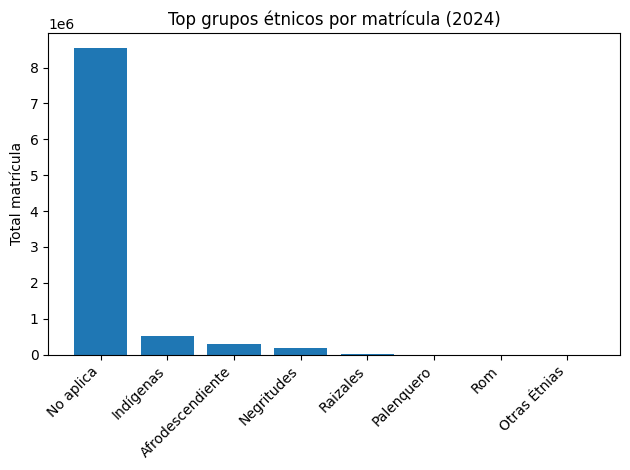

In [9]:

# Sector
sec = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
    .groupby("SECTOR", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("TOTAL_MATRICULA", ascending=False)
)
display(sec)
plt.figure()
plt.bar(sec["SECTOR"], pd.to_numeric(sec["TOTAL_MATRICULA"], errors="coerce"))
plt.title(f"Matrícula por sector ({int(ultimo_anno)})")
plt.ylabel("Total matrícula")
plt.show()

# Zona
zon = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
    .groupby("ZONA", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("TOTAL_MATRICULA", ascending=False)
)
display(zon)
plt.figure()
plt.bar(zon["ZONA"], pd.to_numeric(zon["TOTAL_MATRICULA"], errors="coerce"))
plt.title(f"Matrícula por zona ({int(ultimo_anno)})")
plt.ylabel("Total matrícula")
plt.show()

# Género
if "GENERO" in df.columns:
    gen = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
        .groupby("GENERO", as_index=False)["TOTAL_MATRICULA"]
        .sum()
        .sort_values("TOTAL_MATRICULA", ascending=False)
    )
    display(gen)
    plt.figure()
    plt.bar(gen["GENERO"], pd.to_numeric(gen["TOTAL_MATRICULA"], errors="coerce"))
    plt.title(f"Matrícula por género ({int(ultimo_anno)})")
    plt.ylabel("Total matrícula")
    plt.show()

# Grupo étnico
if "GRUPO_ETNICO" in df.columns:
    et = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
        .groupby("GRUPO_ETNICO", as_index=False)["TOTAL_MATRICULA"]
        .sum()
        .sort_values("TOTAL_MATRICULA", ascending=False)
    )
    display(et.head(10))
    plt.figure()
    plt.bar(et["GRUPO_ETNICO"].head(10), pd.to_numeric(et["TOTAL_MATRICULA"].head(10), errors="coerce"))
    plt.title(f"Top grupos étnicos por matrícula ({int(ultimo_anno)})")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Total matrícula")
    plt.tight_layout()
    plt.show()


## 8) Distribución por grado y jornada (último año)

,GRADO,TOTAL_MATRICULA
26,Sexto,833136
22,Primero,827332
24,Segundo,816234
27,Tercero,798733
25,Septimo,773702
9,Cuarto,757457
23,Quinto,740071
14,Octavo,706513
28,Transición,658828
13,Noveno,647028


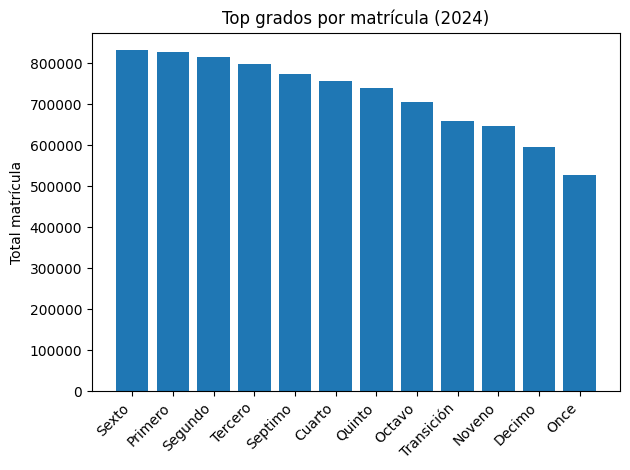

,TIPO_JORNADA,TOTAL_MATRICULA
2,Mañana,4437167
5,Unica,1687243
4,Tarde,1647349
0,Completa,1285247
1,Fin de Semana,259039
3,Nocturna,227095


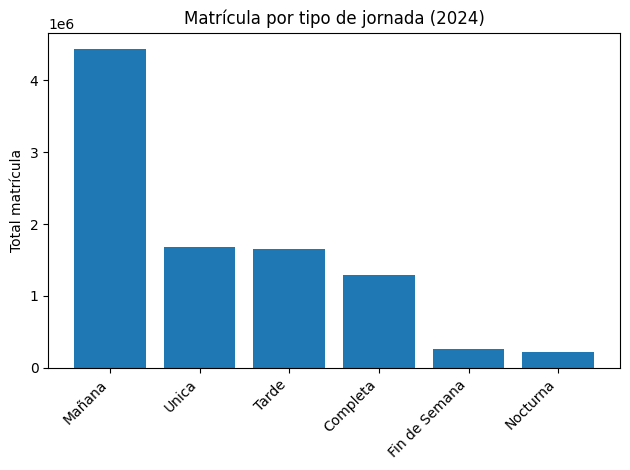

In [10]:

# Grado
gr = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
    .groupby("GRADO", as_index=False)["TOTAL_MATRICULA"]
    .sum()
    .sort_values("TOTAL_MATRICULA", ascending=False)
)
display(gr.head(20))
plt.figure()
plt.bar(gr["GRADO"].head(12), pd.to_numeric(gr["TOTAL_MATRICULA"].head(12), errors="coerce"))
plt.title(f"Top grados por matrícula ({int(ultimo_anno)})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total matrícula")
plt.tight_layout()
plt.show()

# Tipo de jornada
if "TIPO_JORNADA" in df.columns:
    jo = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
        .groupby("TIPO_JORNADA", as_index=False)["TOTAL_MATRICULA"]
        .sum()
        .sort_values("TOTAL_MATRICULA", ascending=False)
    )
    display(jo)
    plt.figure()
    plt.bar(jo["TIPO_JORNADA"], pd.to_numeric(jo["TOTAL_MATRICULA"], errors="coerce"))
    plt.title(f"Matrícula por tipo de jornada ({int(ultimo_anno)})")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Total matrícula")
    plt.tight_layout()
    plt.show()


## 9) Cruces relevantes y evolución YoY

In [11]:

# Sector x Zona en el último año
if set(["SECTOR","ZONA"]).issubset(df.columns):
    sxz = (df[df["ANNO_INF"].astype(float)==ultimo_anno]
        .groupby(["SECTOR","ZONA"], as_index=False)["TOTAL_MATRICULA"]
        .sum()
        .sort_values(["SECTOR","ZONA"])
    )
    display(sxz)

# Evolución género x sector por año (si existen ambas columnas)
if set(["ANNO_INF","SECTOR","GENERO"]).issubset(df.columns):
    gxs = (df
        .groupby(["ANNO_INF","SECTOR","GENERO"], as_index=False)["TOTAL_MATRICULA"]
        .sum()
        .sort_values(["SECTOR","GENERO","ANNO_INF"])
    )
    # Calcular YoY por grupo
    gxs["ANNO_INF"] = pd.to_numeric(gxs["ANNO_INF"], errors="coerce")
    gxs["TOTAL_MATRICULA"] = pd.to_numeric(gxs["TOTAL_MATRICULA"], errors="coerce")
    gxs["YoY_abs"] = gxs.groupby(["SECTOR","GENERO"])["TOTAL_MATRICULA"].diff()
    gxs["YoY_%"] = gxs.groupby(["SECTOR","GENERO"])["TOTAL_MATRICULA"].pct_change()*100
    display(gxs.head(12))


,SECTOR,ZONA,TOTAL_MATRICULA
0,NO_OFICIAL,Rural,114813
1,NO_OFICIAL,Urbana,2013707
2,OFICIAL,Rural,2178847
3,OFICIAL,Urbana,5235773


,ANNO_INF,SECTOR,GENERO,TOTAL_MATRICULA,YoY_abs,YoY_%
0,2022,NO_OFICIAL,Femenino,1040600,NaN,NaN
4,2023,NO_OFICIAL,Femenino,1054495,13895.0,1.335287
8,2024,NO_OFICIAL,Femenino,1028185,-26310.0,-2.495033
1,2022,NO_OFICIAL,Masculino,1110837,NaN,NaN
5,2023,NO_OFICIAL,Masculino,1124848,14011.0,1.261301
9,2024,NO_OFICIAL,Masculino,1100335,-24513.0,-2.179228
2,2022,OFICIAL,Femenino,3863666,NaN,NaN
6,2023,OFICIAL,Femenino,3768748,-94918.0,-2.456682
10,2024,OFICIAL,Femenino,3667428,-101320.0,-2.688426
3,2022,OFICIAL,Masculino,3951108,NaN,NaN


## 10) Exportaciones y cierre

In [12]:

outdir = Path("outputs")
outdir.mkdir(exist_ok=True)

def save_csv(df: pd.DataFrame, name: str):
    p = outdir / f"{name}.csv"
    df.to_csv(p, index=False, encoding="utf-8")
    print("Guardado:", p)

# Guardar los principales resultados si existen en el entorno
for var, name in [
    ("agg_year","trend_matricula_por_anno"),
    ("dept_year","top_departamentos"),
    ("mun_year","top_municipios"),
    ("sec","brechas_sector"),
    ("zon","brechas_zona"),
    ("gen","brechas_genero"),
    ("et","brechas_grupo_etnico"),
    ("gr","distribucion_grado"),
    ("jo","distribucion_jornada"),
]:
    if var in globals():
        try:
            save_csv(globals()[var], name)
        except Exception as e:
            print("No se pudo guardar", name, "->", e)


Guardado: outputs\trend_matricula_por_anno.csv
Guardado: outputs\top_departamentos.csv
Guardado: outputs\top_municipios.csv
Guardado: outputs\brechas_sector.csv
Guardado: outputs\brechas_zona.csv
Guardado: outputs\brechas_genero.csv
Guardado: outputs\brechas_grupo_etnico.csv
Guardado: outputs\distribucion_grado.csv
Guardado: outputs\distribucion_jornada.csv



## 11) Resumen de trabajo realizado

- Verificar la **cobertura temporal** (`ANNO_INF`) y la tendencia de `TOTAL_MATRICULA` (crecimiento o desaceleración interanual).
- Comparar **brechas** por `SECTOR` (Oficial/Privado), `ZONA` (Urbano/Rural), `GENERO` y `GRUPO_ETNICO`.
- Analizar **distribución** por `GRADO` y `TIPO_JORNADA` para entender la composición del sistema.
- Identificar **departamentos/municipios** con mayor y menor matrícula (para focalizar políticas).
- Documentar supuestos y **limitaciones** (p.ej., posibles nulos, duplicados por combinaciones válidas de atributos, diferencias de reporte entre territorios).
